https://github.com/nis1/Crosswalk-Recognition/blob/master/crosswalkRec.py
* Apply filter to get white color
* erode
* find contour and draw green line strip
* calculate median
* Check if the point bounded in the median cycle
* ransac for left and right
* draw ransac circle
* Calculate intersection by bounding line
* calculate direction vector


In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
def open_img(img):
    #image = cv2.imread(img)
    image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return image

In [61]:
def open_img_color(img):
    image = cv2.imread(img)
    print(image.shape)
    return image

In [62]:
def show_image_color(img):
    temp = img[:,:,-1]
    img[:,:,-1] = img[:,:,0]
    img[:,:,0] = temp
    plt.imshow(img)
    plt.show()

In [63]:
def show_image_gray(img):
    plt.imshow(img,  cmap='gray')
    plt.show()

In [64]:
def do_erode(img,iteration):
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(img,kernel,iterations = iteration)
    show_image_gray(erosion)
    return erosion

In [65]:
def do_dilate(img,iteration):
    #https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
    kernel = np.ones((5,5),np.uint8)
    dilation = cv2.dilate(img,kernel,iterations = iteration)
    show_image_gray(dilation)
    return dilation

In [66]:
def filtered_white(img,low_white,high_white):
    mask_white = cv2.inRange(img, low_white, high_white)
    img = cv2.bitwise_and(img, mask_white)
    kernel_size = 5
    gauss_gray = cv2.GaussianBlur(img,(kernel_size,kernel_size),0)
    show_image_gray(gauss_gray)
    return gauss_gray

In [73]:
def ROI(img):
    h,w = img.shape[0],img.shape[1]
    #print(h)
    #print(w)
    triangle = np.array([[(49,h),(429,h),(240,100)]])
    mask = np.zeros_like(img)
    cv2.fillPoly(mask,triangle,255)
    show_image_gray(mask)
    masked_image = cv2.bitwise_and(img,mask)
    return masked_image

In [74]:
def find_contour(color_img,img):
    ### to find the image contour...
    ret,thresh = cv2.threshold(img,127,255,0)
    im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(color_img, contours, -1, (0,255,0), 3)
    show_image_color(color_img)
    return img

(3024, 4032, 3)


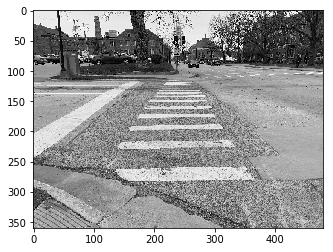

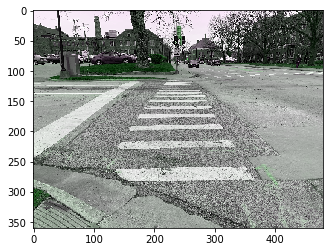

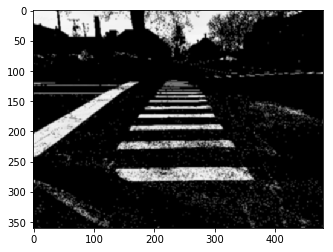

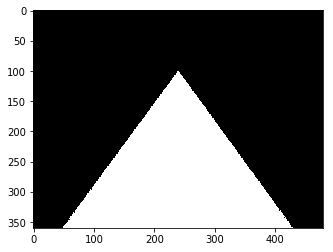

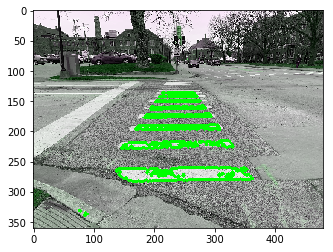

In [79]:
###main
img = open_img('../dataset/IMG_1.jpeg')
img = cv2.resize(img,(480,360))
#print(img.dtype)
img_c = open_img_color('../dataset/IMG_1.jpeg')
img_c = cv2.resize(img_c,(480,360))
show_image_gray(img)
show_image_color(img_c)
img = filtered_white(img,200,255)

#img = do_erode(img,2)
img = ROI(img)
img = find_contour(img_c,img)
#img = do_dilate(img,2)